In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('./play_by_play_silver.csv')

In [4]:
df.head()

,game_id,game_date,home_team,away_team,event_num,event_type,event_action_type,period,minute_game,wc_time_string,time_quarter,minute_remaining_quarter,seconds_remaining_quarter,neutral_description,person1type,player1_id,person2type,player2_id,person3type,player3_id,video_available_flag,season,play_description,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,score,away_score,home_score,score_margin,team_leading,score_margin_complete,score_complete,away_score_complete,home_score_complete,team_leading_complete
0,11300024,10-09-13 0:00,Memphis_Grizzlies,Dallas_Mavericks,1,12,0,1,0.00,8:09 PM,12:00,12,0,Start of 1st Period (8:09 PM EST),0,0,0,0,0,0,0,2013-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home
1,11300024,10-09-13 0:00,Memphis_Grizzlies,Dallas_Mavericks,2,10,0,1,0.00,8:09 PM,12:00,12,0,NaN,4,202334,5,2223,5,1717,0,2013-14,NaN,Ed Davis,1.610613e+09,Memphis,Grizzlies,MEM,Samuel Dalembert,1.610613e+09,Dallas,Mavericks,DAL,Dirk Nowitzki,1.610613e+09,Dallas,Mavericks,DAL,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home
2,11300024,10-09-13 0:00,Memphis_Grizzlies,Dallas_Mavericks,3,2,1,1,0.23,8:10 PM,11:46,11,46,NaN,5,2223,0,0,0,0,0,2013-14,NaN,Samuel Dalembert,1.610613e+09,Dallas,Mavericks,DAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home
3,11300024,10-09-13 0:00,Memphis_Grizzlies,Dallas_Mavericks,4,4,0,1,0.25,8:10 PM,11:45,11,45,NaN,4,202334,0,0,0,0,0,2013-14,NaN,Ed Davis,1.610613e+09,Memphis,Grizzlies,MEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home
4,11300024,10-09-13 0:00,Memphis_Grizzlies,Dallas_Mavericks,5,5,1,1,0.53,8:10 PM,11:28,11,28,NaN,4,2034,0,0,0,0,0,2013-14,NaN,Mike Miller,1.610613e+09,Memphis,Grizzlies,MEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   game_id                    6155 non-null   int64  
 1   game_date                  6155 non-null   object 
 2   home_team                  6155 non-null   object 
 3   away_team                  6155 non-null   object 
 4   event_num                  6155 non-null   int64  
 5   event_type                 6155 non-null   int64  
 6   period                     6155 non-null   int64  
 7   minute_game                6155 non-null   float64
 8   wc_time_string             6155 non-null   object 
 9   time_quarter               6155 non-null   object 
 10  person1type                6155 non-null   int64  
 11  player1_id                 6155 non-null   int64  
 12  person2type                6155 non-null   int64  
 13  player2_id                 6155 non-null   int64

In [5]:
df.isnull().sum()

game_id                         0
game_date                       0
home_team                       0
away_team                       0
event_num                       0
event_type                      0
event_action_type               0
period                          0
minute_game                     0
wc_time_string                  0
time_quarter                    0
minute_remaining_quarter        0
seconds_remaining_quarter       0
neutral_description          6012
person1type                     0
player1_id                      0
person2type                     0
player2_id                      0
person3type                     0
player3_id                      0
video_available_flag            0
season                          0
play_description             5821
player1_name                  722
player1_team_id               564
player1_team_city             564
player1_team_nickname         564
player1_team_abbreviation     564
player2_name                 4272
player2_team_i

In [121]:
# Drop categorical if more than 90% of the data is missing
cat_cols = df.select_dtypes(include=['object']).columns
remove_cat_cols = set()

for col in cat_cols:
    if df[col].isnull().sum() > 0.9 * len(df):
        remove_cat_cols.add(col)

remove_cat_cols


{'neutral_description',
 'play_description',
 'player3_name',
 'player3_team_abbreviation',
 'player3_team_city',
 'player3_team_nickname'}

In [118]:
# Drop numerical if more than 90% of the data is missing
num_cols = df.select_dtypes(include=['number']).columns
remove_num_cols = set()

for col in num_cols:
    if df[col].isnull().sum() > 0.9 * len(df):
        remove_num_cols.add(col)

remove_num_cols

{'player3_team_id'}

In [6]:
hor_mag = df.query('game_id == 11500002')

### Comments
1. 4 - Rebounds have only 1 player
2. 1 - Shot made may have 1 or 2 players
3. 2 - Shot missed has 1 shooter and may have 1 defender
4. 

In [41]:
hor_mag[(hor_mag['person1type'] == 4) & ((hor_mag['person2type'] == 5))]

,game_id,game_date,home_team,away_team,event_num,event_type,event_action_type,period,minute_game,wc_time_string,time_quarter,minute_remaining_quarter,seconds_remaining_quarter,neutral_description,person1type,player1_id,person2type,player2_id,person3type,player3_id,video_available_flag,season,play_description,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,score,away_score,home_score,score_margin,team_leading,score_margin_complete,score_complete,away_score_complete,home_score_complete,team_leading_complete
3375,11500002,10/03/2015 00:00:00,Orlando_Magic,Charlotte_Hornets,1,10,0,1,0.00,7:11 PM,12:00,12,0,NaN,4,203473,5,2744,5,101107,0,2015-16,NaN,Dewayne Dedmon,1.610613e+09,Orlando,Magic,ORL,Al Jefferson,1.610613e+09,Charlotte,Hornets,CHA,Marvin Williams,1.610613e+09,Charlotte,Hornets,CHA,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home
3397,11500002,10/03/2015 00:00:00,Orlando_Magic,Charlotte_Hornets,25,5,1,1,3.25,7:15 PM,8:45,8,45,NaN,4,203901,5,2744,0,0,0,2015-16,Payton Bad Pass Turnover (P1.T1)Jefferson STEA...,Elfrid Payton,1.610613e+09,Orlando,Magic,ORL,Al Jefferson,1.610613e+09,Charlotte,Hornets,CHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5 - 9,5,9,Home
3410,11500002,10/03/2015 00:00:00,Orlando_Magic,Charlotte_Hornets,44,6,2,1,5.20,7:21 PM,6:48,6,48,NaN,4,101112,5,201587,1,0,0,2015-16,NaN,Channing Frye,1.610613e+09,Orlando,Magic,ORL,Nicolas Batum,1.610613e+09,Charlotte,Hornets,CHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7 - 14,7,14,Home
3417,11500002,10/03/2015 00:00:00,Orlando_Magic,Charlotte_Hornets,52,6,2,1,5.58,7:22 PM,6:25,6,25,NaN,4,203473,5,201587,1,0,0,2015-16,NaN,Dewayne Dedmon,1.610613e+09,Orlando,Magic,ORL,Nicolas Batum,1.610613e+09,Charlotte,Hornets,CHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,10 - 14,10,14,Home
3431,11500002,10/03/2015 00:00:00,Orlando_Magic,Charlotte_Hornets,69,6,1,1,7.23,7:25 PM,4:46,4,46,NaN,4,1626209,5,203077,1,0,0,2015-16,NaN,Mario Hezonja,1.610613e+09,Orlando,Magic,ORL,Michael Kidd-Gilchrist,1.610613e+09,Charlotte,Hornets,CHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,11 - 19,11,19,Home
3443,11500002,10/03/2015 00:00:00,Orlando_Magic,Charlotte_Hornets,80,5,1,1,7.72,7:25 PM,4:17,4,17,NaN,4,201160,5,203469,0,0,0,2015-16,Smith Bad Pass Turnover (P1.T3)Zeller STEAL (1...,Jason Smith,1.610613e+09,Orlando,Magic,ORL,Cody Zeller,1.610613e+09,Charlotte,Hornets,CHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,11 - 19,11,19,Home
3473,11500002,10/03/2015 00:00:00,Orlando_Magic,Charlotte_Hornets,117,6,2,1,11.52,7:33 PM,0:29,0,29,NaN,4,203906,5,202391,1,0,0,2015-16,NaN,Devyn Marble,1.610613e+09,Orlando,Magic,ORL,Jeremy Lin,1.610613e+09,Charlotte,Hornets,CHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,21 - 27,21,27,Home
3483,11500002,10/03/2015 00:00:00,Orlando_Magic,Charlotte_Hornets,132,6,2,1,12.00,7:36 PM,0:00,0,0,NaN,4,203473,5,203469,1,0,0,2015-16,NaN,Dewayne Dedmon,1.610613e+09,Orlando,Magic,ORL,Cody Zeller,1.610613e+09,Charlotte,Hornets,CHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,23 - 29,23,29,Home
3498,11500002,10/03/2015 00:00:00,Orlando_Magic,Charlotte_Hornets,149,6,28,2,13.67,7:44 PM,10:20,10,20,NaN,4,201228,5,202391,1,0,0,2015-16,NaN,C.J. Watson,1.610613e+09,Orlando,Magic,ORL,Jeremy Lin,1.610613e+09,Charlotte,Hornets,CHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,24 - 35,24,35,Home
3499,11500002,10/03/2015 00:00:00,Orlando_Magic,Charlotte_Hornets,150,6,1,2,13.78,7:45 PM,10:13,10,13,NaN,4,203906,5,202391,1,0,0,2015-16,NaN,Devyn Marble,1.610613e+09,Orlando,Magic,ORL,Jeremy Lin,1.610613e+09,Charlotte,Hornets,CHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,24 - 35,24,35,Home


In [10]:
df.duplicated().sum()

0

In [76]:
df.columns

Index(['game_id', 'game_date', 'home_team', 'away_team', 'event_num',
       'event_type', 'event_action_type', 'period', 'minute_game',
       'wc_time_string', 'time_quarter', 'minute_remaining_quarter',
       'seconds_remaining_quarter', 'neutral_description', 'person1type',
       'player1_id', 'person2type', 'player2_id', 'person3type', 'player3_id',
       'video_available_flag', 'season', 'play_description', 'player1_name',
       'player1_team_id', 'player1_team_city', 'player1_team_nickname',
       'player1_team_abbreviation', 'player2_name', 'player2_team_id',
       'player2_team_city', 'player2_team_nickname',
       'player2_team_abbreviation', 'player3_name', 'player3_team_id',
       'player3_team_city', 'player3_team_nickname',
       'player3_team_abbreviation', 'score', 'away_score', 'home_score',
       'score_margin', 'team_leading', 'score_margin_complete',
       'score_complete', 'away_score_complete', 'home_score_complete',
       'team_leading_complete'],
   

In [84]:
# remove columns with lots of empty values, duplicate identifiers, uninformative/unusable columns, duplicate information
columns_to_drop = [
    'event_action_type',
    'minute_remaining_quarter',
    'seconds_remaining_quarter',
    'neutral_description',
    'play_description',
    'score',
    'home_score',
    'away_score',
    'score_margin',
    'team_leading',
    'player1_team_nickname',
    'player1_team_city',
    'player2_team_nickname',
    'player2_team_city',
    'player3_team_nickname',
    'player3_team_city',   
]

df.drop(columns_to_drop, axis=1, inplace=True)

KeyError: "['event_action_type', 'minute_remaining_quarter', 'seconds_remaining_quarter', 'neutral_description', 'play_description', 'score', 'home_score', 'away_score', 'score_margin', 'team_leading', 'player1_team_nickname', 'player1_team_city', 'player2_team_nickname', 'player2_team_city', 'player3_team_nickname', 'player3_team_city'] not found in axis"

In [78]:
df['game_date'] = pd.to_datetime(df['game_date'])
df['wc_time_string'] = pd.to_datetime(df['wc_time_string']).dt.time
df.head()

,game_id,game_date,home_team,away_team,event_num,event_type,period,minute_game,wc_time_string,time_quarter,person1type,player1_id,person2type,player2_id,person3type,player3_id,video_available_flag,season,player1_name,player1_team_id,player1_team_abbreviation,player2_name,player2_team_id,player2_team_abbreviation,player3_name,player3_team_id,player3_team_abbreviation,score_margin_complete,score_complete,away_score_complete,home_score_complete,team_leading_complete
0,11300024,2013-10-09,Memphis_Grizzlies,Dallas_Mavericks,1,12,1,0.00,20:09:00,12:00,0,0,0,0,0,0,0,2013-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home
1,11300024,2013-10-09,Memphis_Grizzlies,Dallas_Mavericks,2,10,1,0.00,20:09:00,12:00,4,202334,5,2223,5,1717,0,2013-14,Ed Davis,1.610613e+09,MEM,Samuel Dalembert,1.610613e+09,DAL,Dirk Nowitzki,1.610613e+09,DAL,0,0 - 0,0,0,Home
2,11300024,2013-10-09,Memphis_Grizzlies,Dallas_Mavericks,3,2,1,0.23,20:10:00,11:46,5,2223,0,0,0,0,0,2013-14,Samuel Dalembert,1.610613e+09,DAL,NaN,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home
3,11300024,2013-10-09,Memphis_Grizzlies,Dallas_Mavericks,4,4,1,0.25,20:10:00,11:45,4,202334,0,0,0,0,0,2013-14,Ed Davis,1.610613e+09,MEM,NaN,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home
4,11300024,2013-10-09,Memphis_Grizzlies,Dallas_Mavericks,5,5,1,0.53,20:10:00,11:28,4,2034,0,0,0,0,0,2013-14,Mike Miller,1.610613e+09,MEM,NaN,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home


In [98]:
team_list = [
    "Atlanta_Hawks",
    "Boston_Celtics",
    "Brooklyn_Nets",
    "Charlotte_Bobcats",
    "Charlotte_Hornets",
    "Chicago_Bulls",
    "Cleveland_Cavaliers",
    "Dallas_Mavericks",
    "Denver_Nuggets",
    "Detroit_Pistons",
    "Golden State_Warriors",
    "Houston_Rockets",
    "Indiana_Pacers",
    "LA_Clippers",
    "Los Angeles_Clippers",
    "Los Angeles_Lakers",
    "Memphis_Grizzlies",
    "Miami_Heat",
    "Milwaukee_Bucks",
    "Minnesota_Timberwolves",
    "New Jersey_Nets",
    "New Orleans/Oklahoma City_Hornets",
    "New Orleans_Hornets",
    "New Orleans_Pelicans",
    "New York_Knicks",
    "Oklahoma City_Thunder",
    "Orlando_Magic",
    "Philadelphia_76ers",
    "Phoenix_Suns",
    "Portland_Trail Blazers",
    "Sacramento_Kings",
    "San Antonio_Spurs",
    "Seattle_SuperSonics",
    "Toronto_Raptors",
    "Utah_Jazz",
    "Vancouver_Grizzlies",
    "Washington_Bullets",
    "Washington_Wizards",
]

rename_team_names = {
    "Charlotte_Bobcats": "Charlotte_Hornets",
    "LA_Clippers": "Los Angeles_Clippers",
    "Vancouver_Grizzlies": "Memphis_Grizzlies",
    "Seattle_SuperSonics": "Oklahoma City_Thunder",
    "New Orleans/Oklahoma City_Hornets": "New Orleans_Pelicans",
    "New Orleans_Hornets": "New Orleans_Pelicans",
    "New Jersey_Nets": "Brooklyn_Nets",
    "Washington_Bullets": "Washington_Wizards"
}

# Keep only rows where either home or away team is in the team_list
df = df[df['home_team'].isin(team_list) | df['away_team'].isin(team_list)]

# Update team names everywhere using rename_team_names dictionary
df['home_team'].replace(rename_team_names, inplace=True)
df['away_team'].replace(rename_team_names, inplace=True)

df

,game_id,game_date,home_team,away_team,event_num,event_type,event_action_type,period,minute_game,wc_time_string,time_quarter,minute_remaining_quarter,seconds_remaining_quarter,neutral_description,person1type,player1_id,person2type,player2_id,person3type,player3_id,video_available_flag,season,play_description,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,score,away_score,home_score,score_margin,team_leading,score_margin_complete,score_complete,away_score_complete,home_score_complete,team_leading_complete
4289,11600003,10-02-16 0:00,Houston_Rockets,Shanghai_Shanghai Sharks,0,12,0,1,0.00,8:12 PM,12:00,12,0,Start of 1st Period (8:12 PM EST),0,0,0,0,0,0,0,2016-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home
4290,11600003,10-02-16 0:00,Houston_Rockets,Shanghai_Shanghai Sharks,1,10,0,1,0.00,8:12 PM,12:00,12,0,NaN,4,203991,5,1962937429,4,201935,0,2016-17,NaN,Clint Capela,1.610613e+09,Houston,Rockets,HOU,NaN,12329.0,Shanghai,Shanghai Sharks,SDS,James Harden,1.610613e+09,Houston,Rockets,HOU,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home
4291,11600003,10-02-16 0:00,Houston_Rockets,Shanghai_Shanghai Sharks,2,2,1,1,0.25,8:12 PM,11:45,11,45,NaN,4,2772,0,0,0,0,0,2016-17,NaN,Trevor Ariza,1.610613e+09,Houston,Rockets,HOU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home
4292,11600003,10-02-16 0:00,Houston_Rockets,Shanghai_Shanghai Sharks,3,4,0,1,0.27,8:13 PM,11:44,11,44,NaN,5,1962937426,0,0,0,0,0,2016-17,NaN,NaN,1.232900e+04,Shanghai,Shanghai Sharks,SDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home
4293,11600003,10-02-16 0:00,Houston_Rockets,Shanghai_Shanghai Sharks,4,2,1,1,0.62,8:13 PM,11:23,11,23,NaN,5,1962937429,0,0,4,203991,0,2016-17,Capela BLOCK (1 BLK)MISS Zhaoxu 3' Jump Shot,NaN,1.232900e+04,Shanghai,Shanghai Sharks,SDS,NaN,NaN,NaN,NaN,NaN,Clint Capela,1.610613e+09,Houston,Rockets,HOU,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4767,11600003,10-02-16 0:00,Houston_Rockets,Shanghai_Shanghai Sharks,577,1,5,4,47.58,10:24 PM,0:25,0,25,NaN,5,1962937426,0,0,0,0,0,2016-17,NaN,NaN,1.232900e+04,Shanghai,Shanghai Sharks,SDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94 - 129,94.0,129.0,35.0,Home,35,94 - 129,94,129,Home
4768,11600003,10-02-16 0:00,Houston_Rockets,Shanghai_Shanghai Sharks,579,1,1,4,47.95,10:24 PM,0:03,0,3,NaN,4,1627819,0,0,0,0,0,2016-17,NaN,Isaiah Taylor,1.610613e+09,Houston,Rockets,HOU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94 - 131,94.0,131.0,37.0,Home,37,94 - 131,94,131,Home
4769,11600003,10-02-16 0:00,Houston_Rockets,Shanghai_Shanghai Sharks,580,2,1,4,48.00,10:24 PM,0:00,0,0,NaN,5,1962937431,0,0,0,0,0,2016-17,NaN,Jimmer Fredette,1.232900e+04,Shanghai,Shanghai Sharks,SDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,94 - 131,94,131,Home
4770,11600003,10-02-16 0:00,Houston_Rockets,Shanghai_Shanghai Sharks,581,4,0,4,48.00,10:24 PM,0:00,0,0,NaN,3,12329,0,0,0,0,0,2016-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,94 - 131,94,131,Home


In [83]:
df[['home_team', 'away_team']].melt()['value'].sort_values().unique().tolist()

['Atlanta_Hawks',
 'Boston_Celtics',
 'Brooklyn_Nets',
 'Charlotte_Hornets',
 'Chicago_Bulls',
 'Dallas_Mavericks',
 'Detroit_Pistons',
 'Golden State_Warriors',
 'Houston_Rockets',
 'Indiana_Pacers',
 'Los Angeles_Clippers',
 'Memphis_Grizzlies',
 'Miami_Heat',
 'Minnesota_Timberwolves',
 'Orlando_Magic',
 'Philadelphia_76ers',
 'Sacramento_Kings',
 'Shanghai_Shanghai Sharks',
 'Toronto_Raptors',
 'Washington_Wizards']

In [129]:
first_20 = pd.read_csv('./first_20_games.csv')
first_20.shape

(8504, 32)

In [130]:
first_20.head()

,game_id,game_date,home_team,away_team,event_num,event_type,period,minute_game,wc_time_string,time_quarter,person1type,player1_id,person2type,player2_id,person3type,player3_id,video_available_flag,season,player1_name,player1_team_id,player1_team_abbreviation,player2_name,player2_team_id,player2_team_abbreviation,player3_name,player3_team_id,player3_team_abbreviation,score_margin_complete,score_complete,away_score_complete,home_score_complete,team_leading_complete
0,11300107,10/24/2013 00:00:00,Golden State_Warriors,Portland_Trail Blazers,0,12,1,0.00,10:43 PM,12:00,0,0,0,0,0,0,0,2013-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home
1,11300107,10/24/2013 00:00:00,Golden State_Warriors,Portland_Trail Blazers,1,10,1,0.00,10:43 PM,12:00,4,101106,5,201577,5,200746,0,2013-14,Andrew Bogut,1.610613e+09,GSW,Robin Lopez,1.610613e+09,POR,LaMarcus Aldridge,1.610613e+09,POR,0,0 - 0,0,0,Home
2,11300107,10/24/2013 00:00:00,Golden State_Warriors,Portland_Trail Blazers,2,5,1,0.17,10:44 PM,11:50,5,201587,4,201578,0,0,0,2013-14,Nicolas Batum,1.610613e+09,POR,Marreese Speights,1.610613e+09,GSW,NaN,NaN,NaN,0,0 - 0,0,0,Home
3,11300107,10/24/2013 00:00:00,Golden State_Warriors,Portland_Trail Blazers,3,1,1,0.45,10:44 PM,11:33,4,101106,0,0,0,0,0,2013-14,Andrew Bogut,1.610613e+09,GSW,NaN,NaN,NaN,NaN,NaN,NaN,2,0 - 2,0,2,Home
4,11300107,10/24/2013 00:00:00,Golden State_Warriors,Portland_Trail Blazers,4,2,1,0.68,10:44 PM,11:19,5,200746,0,0,0,0,0,2013-14,LaMarcus Aldridge,1.610613e+09,POR,NaN,NaN,NaN,NaN,NaN,NaN,2,0 - 2,0,2,Home


In [131]:
first_20.columns

Index(['game_id', 'game_date', 'home_team', 'away_team', 'event_num',
       'event_type', 'period', 'minute_game', 'wc_time_string', 'time_quarter',
       'person1type', 'player1_id', 'person2type', 'player2_id', 'person3type',
       'player3_id', 'video_available_flag', 'season', 'player1_name',
       'player1_team_id', 'player1_team_abbreviation', 'player2_name',
       'player2_team_id', 'player2_team_abbreviation', 'player3_name',
       'player3_team_id', 'player3_team_abbreviation', 'score_margin_complete',
       'score_complete', 'away_score_complete', 'home_score_complete',
       'team_leading_complete'],
      dtype='object')

In [132]:
import numpy as np
# Create a function to generate game name
def generate_game_name(df):
    teams = df[
        ["player1_team_abbreviation", "player2_team_abbreviation"]
    ].values.flatten()
    unique_teams = "-".join(filter(None, list(set(teams).difference(set([np.nan])))))
    game_name = str(df["season"].values[0]) + "-" + unique_teams
    return game_name


# Group by game_id and apply the function
first_20 = first_20.merge(
    first_20.groupby("game_id")
    .apply(lambda x: generate_game_name(x))
    .reset_index()
    .rename(columns={0: "game_name"}),
    on="game_id",
    how="left",
)

In [133]:
first_20.shape

(8504, 33)

KeyboardInterrupt: 

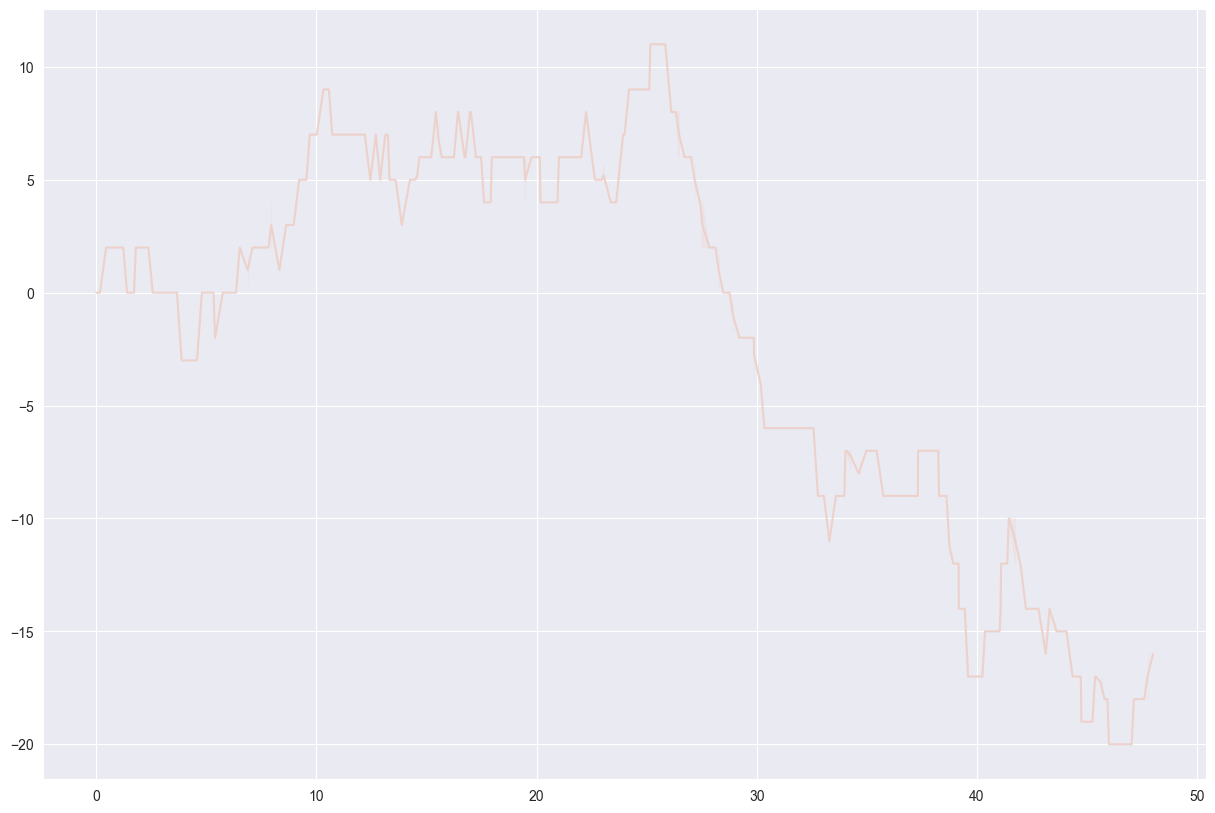

In [134]:
# Score margin over time by game
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='minute_game', y='score_margin_complete', hue='game_id', data=first_20, ax=ax)
plt.title('Score Margin Over Time by Game', fontsize=20)
plt.xlabel('Minute of Game', fontsize=15)
plt.ylabel('Score Margin', fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.show()


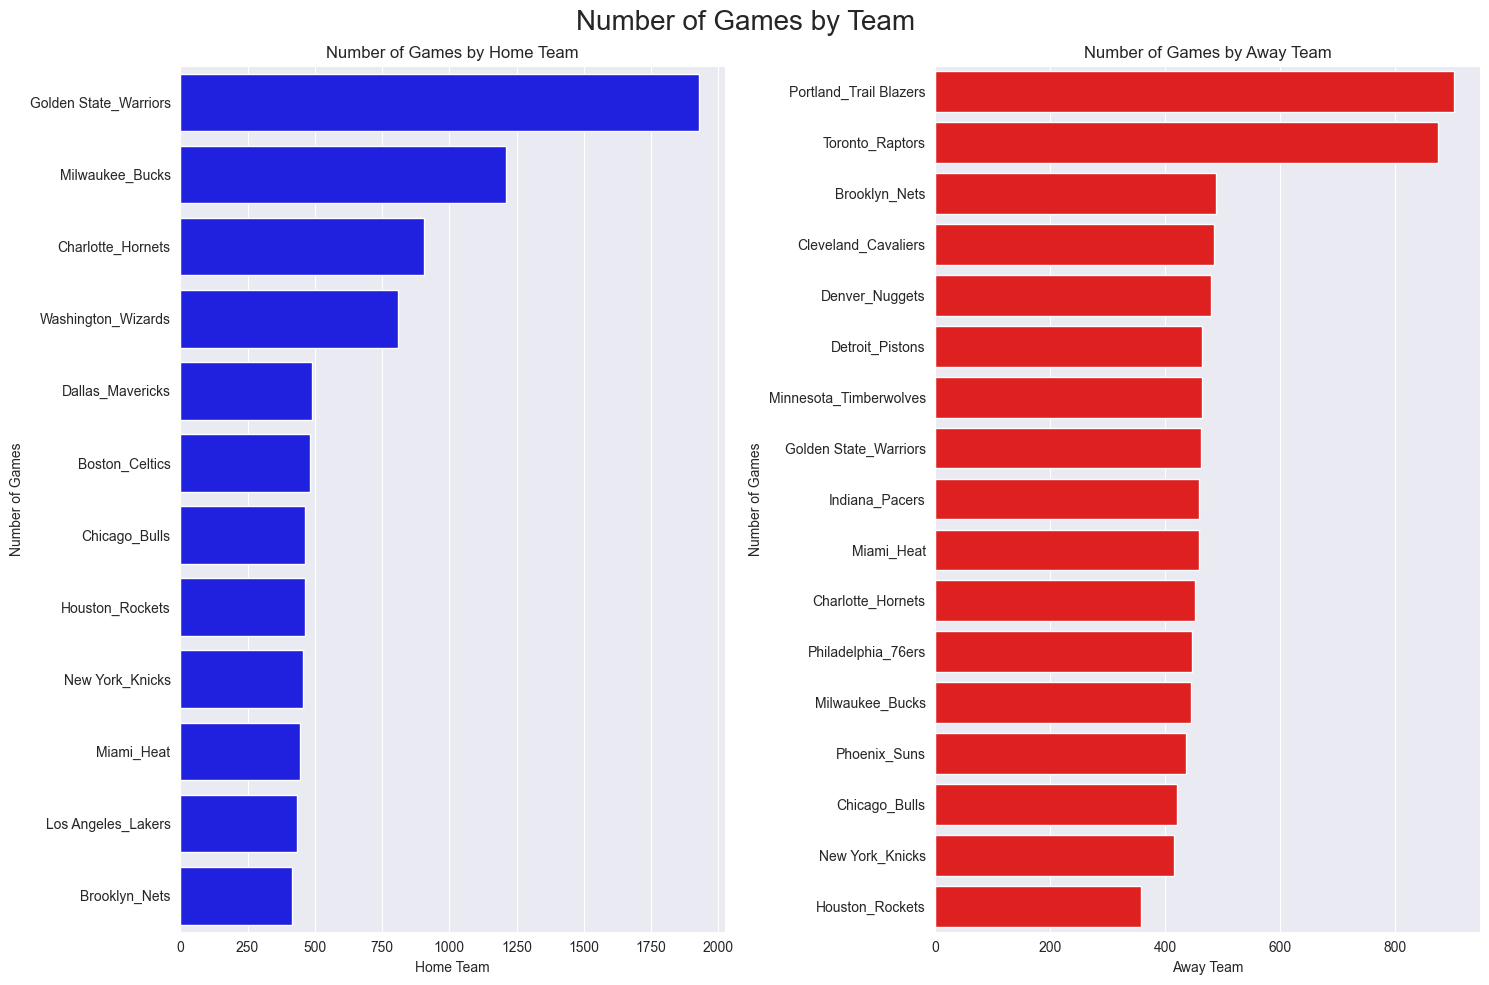

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 10))

ax[0] = sns.countplot(
    y="home_team",
    data=first_20,
    order=first_20["home_team"].value_counts().index,
    color="blue",
    ax=ax[0],
)
ax[0].set_title("Number of Games by Home Team")
ax[0].set_xlabel("Home Team")
ax[0].set_ylabel("Number of Games")

ax[1] = sns.countplot(
    y="away_team",
    data=first_20,
    order=first_20["away_team"].value_counts().index,
    color="red",
    ax=ax[1],
)
ax[1].set_title("Number of Games by Away Team")
ax[1].set_xlabel("Away Team")
ax[1].set_ylabel("Number of Games")

plt.suptitle("Number of Games by Team", fontsize=20)
plt.tight_layout()
plt.show()

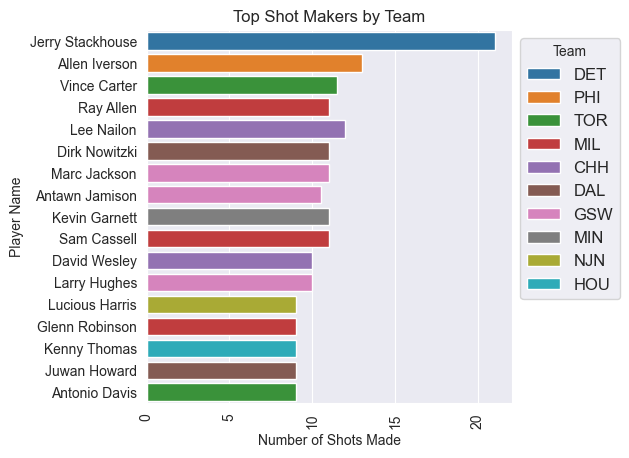

In [37]:
ax = sns.barplot(
    data=(
        first_20[first_20["event_type"] == 1]
        .groupby(["game_id", "player1_team_abbreviation", "player1_name"])
        .agg({"event_type": "sum"})
        .sort_values("event_type", ascending=False)
        .reset_index()
    ).head(20),
    y="player1_name",
    x="event_type",
    hue="player1_team_abbreviation",
    errorbar=None
)

ax.set_title("Top Shot Makers by Team")
ax.set_ylabel("Player Name")
ax.set_xlabel("Number of Shots Made")
plt.xticks(rotation=90)
plt.legend(title = "Team", loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)
plt.tight_layout()
plt.show()


In [67]:
# select numerical columns and check distributions and correlations

numeric_columns = [
    'event_type',
    'period',
    'minute_game',
    'score_margin_complete',
    'away_score_complete',
    'home_score_complete'
]

first_20[numeric_columns].describe()

,event_type,period,minute_game,score_margin_complete,away_score_complete,home_score_complete
count,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000
mean,3.921919,2.525165,24.640782,-1.544097,50.493650,48.949553
std,2.514878,1.110957,13.782450,9.696824,28.948834,27.757682
min,1.000000,1.000000,0.000000,-28.000000,0.000000,0.000000
25%,2.000000,2.000000,12.720000,-8.000000,26.000000,25.000000
50%,4.000000,3.000000,24.330000,-1.000000,50.000000,50.000000
75%,5.000000,4.000000,36.355000,5.000000,76.000000,71.000000
max,18.000000,4.000000,48.000000,22.000000,110.000000,120.000000


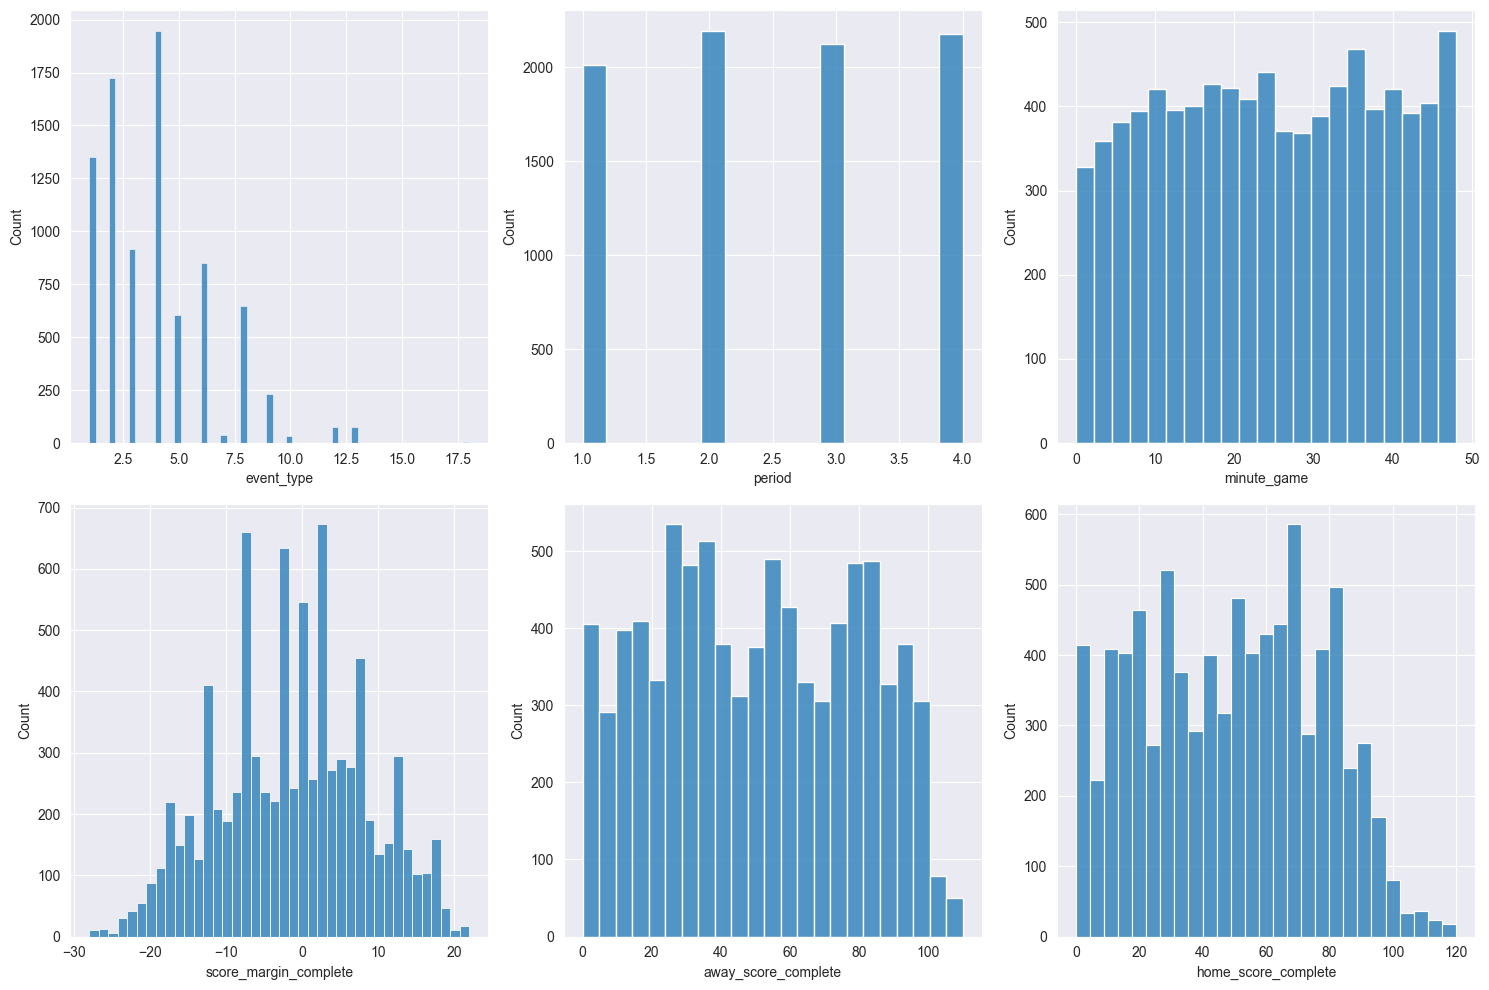

In [70]:
# Plot univariate distributions of numeric columns
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    sns.histplot(first_20[column], ax=ax[i//3, i%3])
plt.tight_layout()
plt.show()

The univariate distribution for `score_margin` seems to be normally distributed.

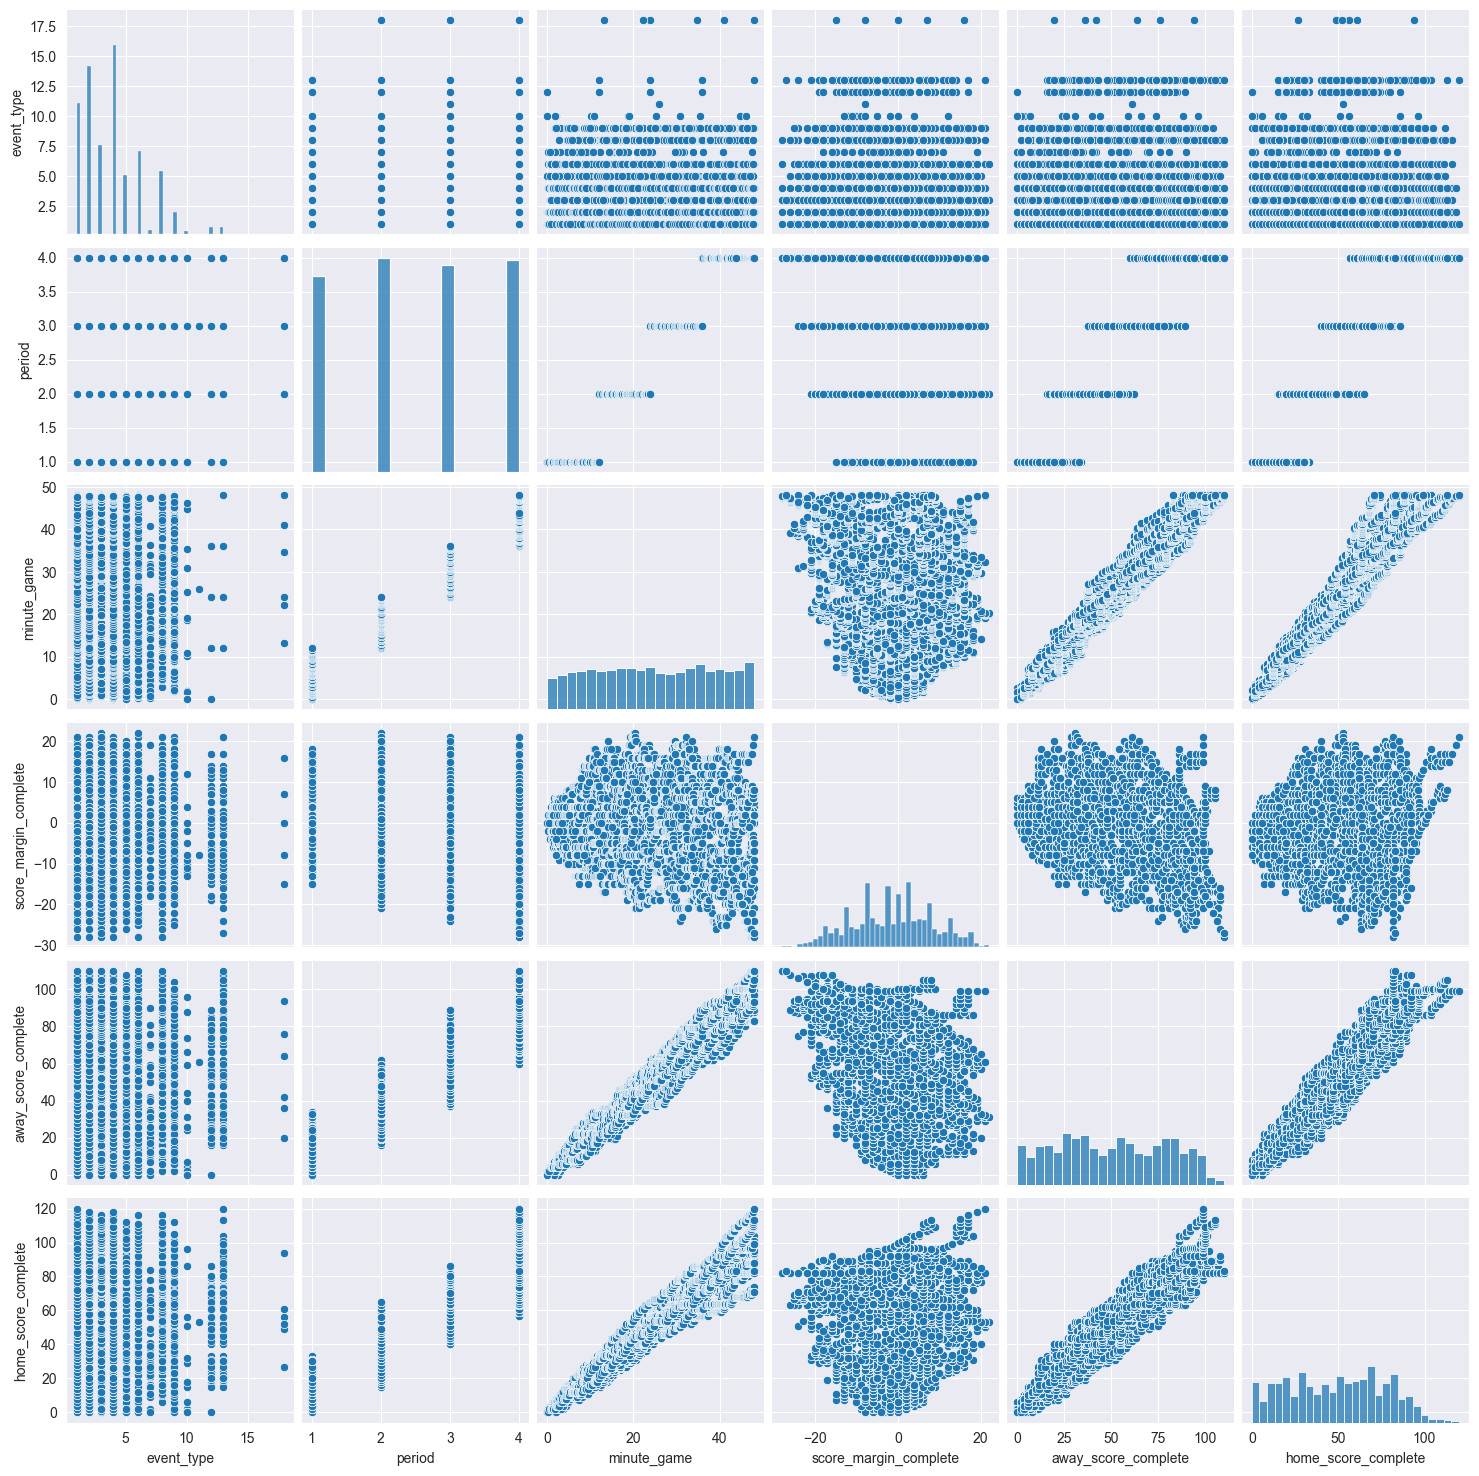

In [71]:
sns.pairplot(first_20[numeric_columns])

In [136]:
# month and day from game_date and year from season
first_20["game_date"] = pd.to_datetime(first_20["game_date"])
first_20["month"] = first_20["game_date"].dt.month
first_20["day"] = first_20["game_date"].dt.day

first_20["year"] = first_20["season"].apply(lambda x: x.split("-")[0]).astype(int)

In [85]:
first_20

,game_id,game_date,home_team,away_team,event_num,event_type,period,minute_game,wc_time_string,time_quarter,person1type,player1_id,person2type,player2_id,person3type,player3_id,video_available_flag,season,player1_name,player1_team_id,player1_team_abbreviation,player2_name,player2_team_id,player2_team_abbreviation,player3_name,player3_team_id,player3_team_abbreviation,score_margin_complete,score_complete,away_score_complete,home_score_complete,team_leading_complete,month,day,year
0,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,0,12,1,0.00,10:43 PM,12:00,0,0,0,0,0,0,0,2013-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home,10,24,2013
1,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,1,10,1,0.00,10:43 PM,12:00,4,101106,5,201577,5,200746,0,2013-14,Andrew Bogut,1.610613e+09,GSW,Robin Lopez,1.610613e+09,POR,LaMarcus Aldridge,1.610613e+09,POR,0,0 - 0,0,0,Home,10,24,2013
2,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,2,5,1,0.17,10:44 PM,11:50,5,201587,4,201578,0,0,0,2013-14,Nicolas Batum,1.610613e+09,POR,Marreese Speights,1.610613e+09,GSW,NaN,NaN,NaN,0,0 - 0,0,0,Home,10,24,2013
3,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,3,1,1,0.45,10:44 PM,11:33,4,101106,0,0,0,0,0,2013-14,Andrew Bogut,1.610613e+09,GSW,NaN,NaN,NaN,NaN,NaN,NaN,2,0 - 2,0,2,Home,10,24,2013
4,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,4,2,1,0.68,10:44 PM,11:19,5,200746,0,0,0,0,0,2013-14,LaMarcus Aldridge,1.610613e+09,POR,NaN,NaN,NaN,NaN,NaN,NaN,2,0 - 2,0,2,Home,10,24,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8499,20100746,2002-02-18,Washington_Wizards,Houston_Rockets,366,4,4,43.05,2:57 PM,4:57,4,461,0,0,0,0,0,2001-02,Popeye Jones,1.610613e+09,WAS,NaN,NaN,NaN,NaN,NaN,NaN,-9,92 - 83,92,83,Away,2,18,2001
8500,20100746,2002-02-18,Washington_Wizards,Houston_Rockets,367,2,4,43.07,2:58 PM,4:56,4,461,0,0,5,1509,0,2001-02,Popeye Jones,1.610613e+09,WAS,NaN,NaN,NaN,Kelvin Cato,1.610613e+09,HOU,-9,92 - 83,92,83,Away,2,18,2001
8501,20100746,2002-02-18,Washington_Wizards,Houston_Rockets,368,4,4,43.10,2:58 PM,4:54,5,1509,0,0,0,0,0,2001-02,Kelvin Cato,1.610613e+09,HOU,NaN,NaN,NaN,NaN,NaN,NaN,-9,92 - 83,92,83,Away,2,18,2001
8502,20100746,2002-02-18,Washington_Wizards,Houston_Rockets,369,1,4,43.48,2:58 PM,4:31,5,1903,0,0,0,0,0,2001-02,Kenny Thomas,1.610613e+09,HOU,NaN,NaN,NaN,NaN,NaN,NaN,-11,94 - 83,94,83,Away,2,18,2001


In [137]:
first_20["score_margin_40_events_ago"] = first_20.groupby('game_id')['score_margin_complete'].shift(40)

first_20['momentum_40'] = first_20['score_margin_complete'] - first_20['score_margin_40_events_ago']

first_20 = first_20.dropna(subset=['momentum_40'])

display(first_20)

,game_id,game_date,home_team,away_team,event_num,event_type,period,minute_game,wc_time_string,time_quarter,person1type,player1_id,person2type,player2_id,person3type,player3_id,video_available_flag,season,player1_name,player1_team_id,player1_team_abbreviation,player2_name,player2_team_id,player2_team_abbreviation,player3_name,player3_team_id,player3_team_abbreviation,score_margin_complete,score_complete,away_score_complete,home_score_complete,team_leading_complete,game_name,month,day,year,score_margin_40_events_ago,momentum_40
40,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,42,6,1,4.58,10:49 PM,7:25,5,203081,4,101106,1,0,0,2013-14,Damian Lillard,1.610613e+09,POR,Andrew Bogut,1.610613e+09,GSW,NaN,NaN,NaN,-3,7 - 4,7,4,Away,2013-14-POR-GSW,10,24,2013,0.0,-3.0
41,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,43,5,1,4.58,10:49 PM,7:25,5,203081,0,0,1,0,0,2013-14,Damian Lillard,1.610613e+09,POR,NaN,NaN,NaN,NaN,NaN,NaN,-3,7 - 4,7,4,Away,2013-14-POR-GSW,10,24,2013,0.0,-3.0
42,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,44,1,1,4.80,10:49 PM,7:12,4,2738,4,201939,0,0,0,2013-14,Andre Iguodala,1.610613e+09,GSW,Stephen Curry,1.610613e+09,GSW,NaN,NaN,NaN,0,7 - 7,7,7,Home,2013-14-POR-GSW,10,24,2013,0.0,0.0
43,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,45,2,1,5.12,10:49 PM,6:53,5,200746,0,0,0,0,0,2013-14,LaMarcus Aldridge,1.610613e+09,POR,NaN,NaN,NaN,NaN,NaN,NaN,0,7 - 7,7,7,Home,2013-14-POR-GSW,10,24,2013,2.0,-2.0
44,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,46,4,1,5.13,10:49 PM,6:52,4,101106,0,0,0,0,0,2013-14,Andrew Bogut,1.610613e+09,GSW,NaN,NaN,NaN,NaN,NaN,NaN,0,7 - 7,7,7,Home,2013-14-POR-GSW,10,24,2013,2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8499,20100746,2002-02-18,Washington_Wizards,Houston_Rockets,366,4,4,43.05,2:57 PM,4:57,4,461,0,0,0,0,0,2001-02,Popeye Jones,1.610613e+09,WAS,NaN,NaN,NaN,NaN,NaN,NaN,-9,92 - 83,92,83,Away,2001-02-HOU-WAS,2,18,2001,-9.0,0.0
8500,20100746,2002-02-18,Washington_Wizards,Houston_Rockets,367,2,4,43.07,2:58 PM,4:56,4,461,0,0,5,1509,0,2001-02,Popeye Jones,1.610613e+09,WAS,NaN,NaN,NaN,Kelvin Cato,1.610613e+09,HOU,-9,92 - 83,92,83,Away,2001-02-HOU-WAS,2,18,2001,-8.0,-1.0
8501,20100746,2002-02-18,Washington_Wizards,Houston_Rockets,368,4,4,43.10,2:58 PM,4:54,5,1509,0,0,0,0,0,2001-02,Kelvin Cato,1.610613e+09,HOU,NaN,NaN,NaN,NaN,NaN,NaN,-9,92 - 83,92,83,Away,2001-02-HOU-WAS,2,18,2001,-8.0,-1.0
8502,20100746,2002-02-18,Washington_Wizards,Houston_Rockets,369,1,4,43.48,2:58 PM,4:31,5,1903,0,0,0,0,0,2001-02,Kenny Thomas,1.610613e+09,HOU,NaN,NaN,NaN,NaN,NaN,NaN,-11,94 - 83,94,83,Away,2001-02-HOU-WAS,2,18,2001,-8.0,-3.0


In [110]:
g1 = first_20.query('game_id == 11300107')
display(g1)
display(g1.shift(40))

,game_id,game_date,home_team,away_team,event_num,event_type,period,minute_game,wc_time_string,time_quarter,person1type,player1_id,person2type,player2_id,person3type,player3_id,video_available_flag,season,player1_name,player1_team_id,player1_team_abbreviation,player2_name,player2_team_id,player2_team_abbreviation,player3_name,player3_team_id,player3_team_abbreviation,score_margin_complete,score_complete,away_score_complete,home_score_complete,team_leading_complete,month,day,year
0,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,0,12,1,0.00,10:43 PM,12:00,0,0,0,0,0,0,0,2013-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0 - 0,0,0,Home,10,24,2013
1,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,1,10,1,0.00,10:43 PM,12:00,4,101106,5,201577,5,200746,0,2013-14,Andrew Bogut,1.610613e+09,GSW,Robin Lopez,1.610613e+09,POR,LaMarcus Aldridge,1.610613e+09,POR,0,0 - 0,0,0,Home,10,24,2013
2,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,2,5,1,0.17,10:44 PM,11:50,5,201587,4,201578,0,0,0,2013-14,Nicolas Batum,1.610613e+09,POR,Marreese Speights,1.610613e+09,GSW,NaN,NaN,NaN,0,0 - 0,0,0,Home,10,24,2013
3,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,3,1,1,0.45,10:44 PM,11:33,4,101106,0,0,0,0,0,2013-14,Andrew Bogut,1.610613e+09,GSW,NaN,NaN,NaN,NaN,NaN,NaN,2,0 - 2,0,2,Home,10,24,2013
4,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,4,2,1,0.68,10:44 PM,11:19,5,200746,0,0,0,0,0,2013-14,LaMarcus Aldridge,1.610613e+09,POR,NaN,NaN,NaN,NaN,NaN,NaN,2,0 - 2,0,2,Home,10,24,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,554,4,4,47.60,12:53 AM,0:24,4,203473,0,0,0,0,0,2013-14,Dewayne Dedmon,1.610613e+09,GSW,NaN,NaN,NaN,NaN,NaN,NaN,-18,90 - 72,90,72,Away,10,24,2013
494,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,555,6,4,47.75,12:54 AM,0:15,5,203086,4,203145,1,0,0,2013-14,Meyers Leonard,1.610613e+09,POR,Kent Bazemore,1.610613e+09,GSW,NaN,NaN,NaN,-18,90 - 72,90,72,Away,10,24,2013
495,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,556,3,4,47.75,12:54 AM,0:15,4,203145,0,0,0,0,0,2013-14,Kent Bazemore,1.610613e+09,GSW,NaN,NaN,NaN,NaN,NaN,NaN,-17,90 - 73,90,73,Away,10,24,2013
496,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,558,3,4,47.75,12:54 AM,0:15,4,203145,0,0,0,0,0,2013-14,Kent Bazemore,1.610613e+09,GSW,NaN,NaN,NaN,NaN,NaN,NaN,-16,90 - 74,90,74,Away,10,24,2013


,game_id,game_date,home_team,away_team,event_num,event_type,period,minute_game,wc_time_string,time_quarter,person1type,player1_id,person2type,player2_id,person3type,player3_id,video_available_flag,season,player1_name,player1_team_id,player1_team_abbreviation,player2_name,player2_team_id,player2_team_abbreviation,player3_name,player3_team_id,player3_team_abbreviation,score_margin_complete,score_complete,away_score_complete,home_score_complete,team_leading_complete,month,day,year
0,NaN,NaT,None,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,NaN,None,NaN,NaN,None,NaN,NaN,NaN
1,NaN,NaT,None,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,NaN,None,NaN,NaN,None,NaN,NaN,NaN
2,NaN,NaT,None,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,NaN,None,NaN,NaN,None,NaN,NaN,NaN
3,NaN,NaT,None,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,NaN,None,NaN,NaN,None,NaN,NaN,NaN
4,NaN,NaT,None,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,NaN,None,NaN,NaN,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,11300107.0,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,510.0,2.0,4.0,44.72,12:45 AM,3:17,5.0,2.030810e+05,0.0,0.0,0.0,0.0,0.0,2013-14,Damian Lillard,1.610613e+09,POR,NaN,NaN,NaN,NaN,NaN,NaN,-17.0,85 - 68,85.0,68.0,Away,10.0,24.0,2013.0
494,11300107.0,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,511.0,4.0,4.0,44.72,12:45 AM,3:17,3.0,1.610613e+09,0.0,0.0,0.0,0.0,0.0,2013-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.0,85 - 68,85.0,68.0,Away,10.0,24.0,2013.0
495,11300107.0,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,512.0,8.0,4.0,44.72,12:45 AM,3:17,4.0,2.019390e+05,4.0,201962.0,0.0,0.0,0.0,2013-14,Stephen Curry,1.610613e+09,GSW,Toney Douglas,1.610613e+09,GSW,NaN,NaN,NaN,-17.0,85 - 68,85.0,68.0,Away,10.0,24.0,2013.0
496,11300107.0,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,513.0,8.0,4.0,44.72,12:45 AM,3:17,5.0,2.015770e+05,5.0,203086.0,0.0,0.0,0.0,2013-14,Robin Lopez,1.610613e+09,POR,Meyers Leonard,1.610613e+09,POR,NaN,NaN,NaN,-17.0,85 - 68,85.0,68.0,Away,10.0,24.0,2013.0


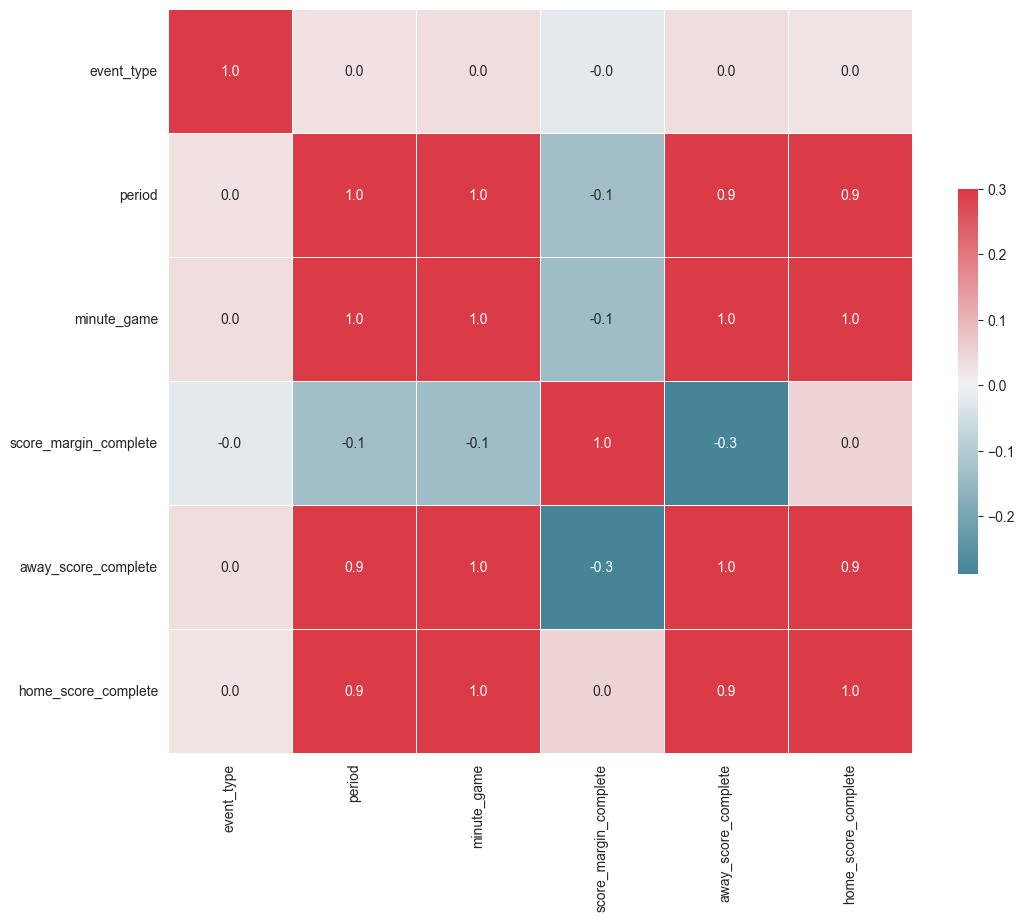

In [126]:
# seaborn heatmap
plt.figure(figsize=(12, 10))

corr = first_20[numeric_columns].corr()
sns.heatmap(
    corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True, center="light"),
    vmax=0.3,
    center=0,
    square=True,
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

# plt.title(f"Correlation matrix of numeric columns in {city.capitalize()} listings")
plt.show()

In [139]:
first_20.head()

,game_id,game_date,home_team,away_team,event_num,event_type,period,minute_game,wc_time_string,time_quarter,person1type,player1_id,person2type,player2_id,person3type,player3_id,video_available_flag,season,player1_name,player1_team_id,player1_team_abbreviation,player2_name,player2_team_id,player2_team_abbreviation,player3_name,player3_team_id,player3_team_abbreviation,score_margin_complete,score_complete,away_score_complete,home_score_complete,team_leading_complete,game_name,month,day,year,score_margin_40_events_ago,momentum_40
40,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,42,6,1,4.58,10:49 PM,7:25,5,203081,4,101106,1,0,0,2013-14,Damian Lillard,1.610613e+09,POR,Andrew Bogut,1.610613e+09,GSW,NaN,NaN,NaN,-3,7 - 4,7,4,Away,2013-14-POR-GSW,10,24,2013,0.0,-3.0
41,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,43,5,1,4.58,10:49 PM,7:25,5,203081,0,0,1,0,0,2013-14,Damian Lillard,1.610613e+09,POR,NaN,NaN,NaN,NaN,NaN,NaN,-3,7 - 4,7,4,Away,2013-14-POR-GSW,10,24,2013,0.0,-3.0
42,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,44,1,1,4.80,10:49 PM,7:12,4,2738,4,201939,0,0,0,2013-14,Andre Iguodala,1.610613e+09,GSW,Stephen Curry,1.610613e+09,GSW,NaN,NaN,NaN,0,7 - 7,7,7,Home,2013-14-POR-GSW,10,24,2013,0.0,0.0
43,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,45,2,1,5.12,10:49 PM,6:53,5,200746,0,0,0,0,0,2013-14,LaMarcus Aldridge,1.610613e+09,POR,NaN,NaN,NaN,NaN,NaN,NaN,0,7 - 7,7,7,Home,2013-14-POR-GSW,10,24,2013,2.0,-2.0
44,11300107,2013-10-24,Golden State_Warriors,Portland_Trail Blazers,46,4,1,5.13,10:49 PM,6:52,4,101106,0,0,0,0,0,2013-14,Andrew Bogut,1.610613e+09,GSW,NaN,NaN,NaN,NaN,NaN,NaN,0,7 - 7,7,7,Home,2013-14-POR-GSW,10,24,2013,2.0,-2.0
